In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

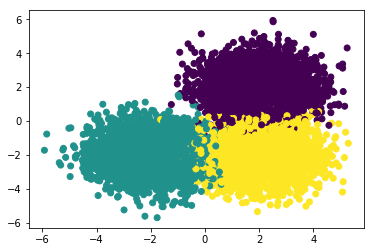

In [29]:
centers = [[2,2], [-2,-2], [2,-2]]

X, y = make_blobs(n_samples=10000, centers=centers, cluster_std=1, n_features=2, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9,random_state=42)

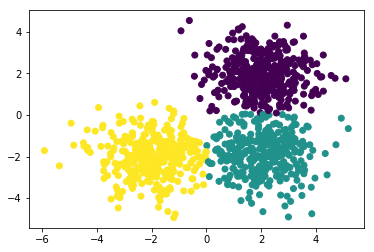

Comparing k-means clusters against the data:
col_0    0    1    2
row_0               
0      352    1    6
1       10    9  307
2        0  310    5


In [30]:
#k-means
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=3).fit_predict(X_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

print("Comparing k-means clusters against the data:")
print(pd.crosstab(y_pred,y_train))

In [34]:
kmeans_correct = (352 + 9 + 5)

In [35]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [36]:
bandwidth = estimate_bandwidth(X_train, quantile=.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

MeanShift(bandwidth=1.8126617424666345, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [37]:
labels = ms.labels_

cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 3


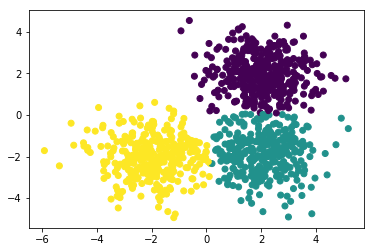

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8


In [38]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print("Comparing the assigned categories to the ones in the data:")
print(pd.crosstab(y_train,labels))

In [39]:
meanshift_correct = 352+8+8

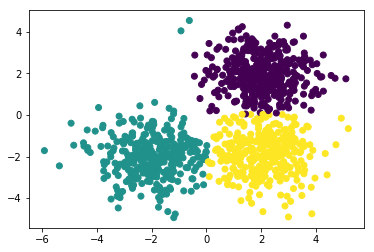

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      350    2   10
1        1  310    9
2        7    6  305


In [40]:
from sklearn.cluster import SpectralClustering

n_clusters = 3

sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

predict = sc.fit_predict(X_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print("Comparing the assigned categories to the ones in the data:")
print(pd.crosstab(y_train,predict))

In [41]:
spec_clust_correct = 350+310+305

In [9]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

af = AffinityPropagation().fit(X_train)
print("Done")

cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print("Estimated number of clusters: {}".format(n_clusters_))

Done
Estimated number of clusters: 93


In [42]:
affprop_clusters = 93

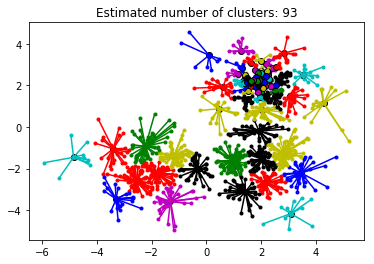

In [10]:
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + ".")
    plt.plot(cluster_center[0],
            cluster_center[1], "o", markerfacecolor=col,
            markeredgecolor="k")
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
        
plt.title("Estimated number of clusters: {}".format(n_clusters_))
plt.show()

### **DRILL: Mo' blobs, mo' problems?**
You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ( kk -means, mean shift, spectral clustering and affinity propagation) on each one. Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups.

### Configuration #1: 3 blobs with centers closer together


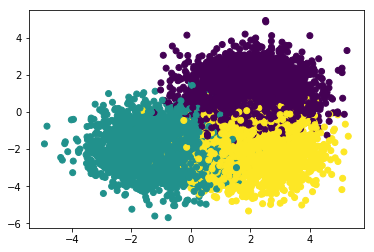

In [43]:
# keeping three blobs, but making them closer together

centers = [[2,1], [-1,-2], [2,-2]]

X, y = make_blobs(n_samples=10000, centers=centers, cluster_std=1, n_features=2, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9,random_state=42)

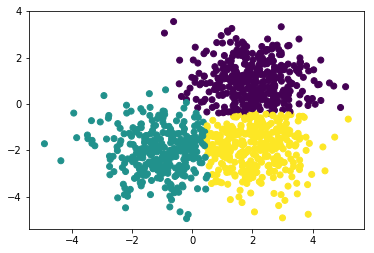

Comparing k-means clusters against the data:
col_0    0    1    2
row_0               
0      333    4   24
1        2  286   12
2       27   30  282


In [12]:
# k-Means

from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=3).fit_predict(X_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

print("Comparing k-means clusters against the data:")
print(pd.crosstab(y_pred,y_train))

In [44]:
kmeans_correct_closeblobs = 333 + 286 + 282
kmeans_correct_closeblobs - kmeans_correct

535

Number of estimated clusters: 3


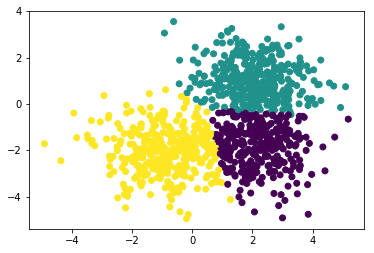

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0       34  326    2
1       14    1  305
2      269   20   29


In [45]:
#Meanshift
bandwidth = estimate_bandwidth(X_train, quantile=.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

labels = ms.labels_

cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print("Comparing the assigned categories to the ones in the data:")
print(pd.crosstab(y_train,labels))

In [ ]:
labels

In [46]:
meanshift_correct_closeblobs = 34+1+29
meanshift_correct_closeblobs - meanshift_correct

-304

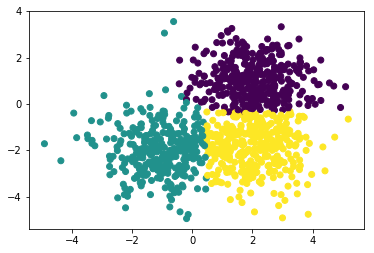

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      325    4   33
1        2  286   32
2       20   12  286


In [47]:
#Spectral Clustering

from sklearn.cluster import SpectralClustering

n_clusters = 3

sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

predict = sc.fit_predict(X_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print("Comparing the assigned categories to the ones in the data:")
print(pd.crosstab(y_train,predict))

In [48]:
spec_clust_correct_closeblobs = 325 + 286 + 286
spec_clust_correct_closeblobs - spec_clust_correct

-68

In [49]:
# Affinity Propagation

af = AffinityPropagation().fit(X_train)
print("Done")

cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print("Estimated number of clusters: {}".format(n_clusters_))

Done
Estimated number of clusters: 33


In [50]:
affprop_clusters_closeblobs = 33
affprop_clusters_closeblobs - affprop_clusters

-60

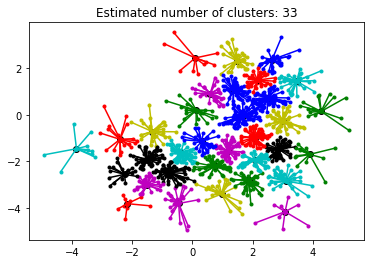

In [51]:
# visual of affinity propagation

plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + ".")
    plt.plot(cluster_center[0],
            cluster_center[1], "o", markerfacecolor=col,
            markeredgecolor="k")
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
        
plt.title("Estimated number of clusters: {}".format(n_clusters_))
plt.show()

### Configuration #2: 4 blobs

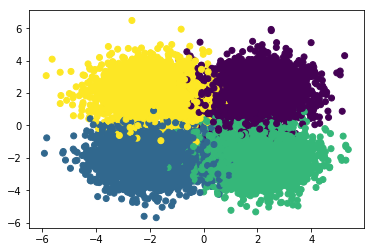

In [52]:
# adding one more blob, 4 total

centers = [[2,2], [-2,-2], [2,-2], [-2, 2]]

X, y = make_blobs(n_samples=10000, centers=centers, cluster_std=1, n_features=2, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9,random_state=42)

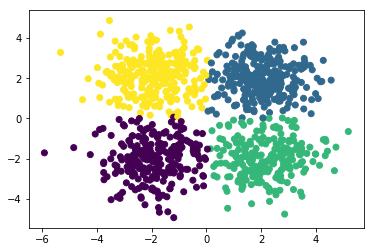

Comparing k-means clusters against the data:
col_0    0    1    2    3
row_0                    
0        0  228    9    7
1      260    0    3    2
2        5    6  226    0
3        8    5    0  241


In [53]:
# k-Means

from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=4).fit_predict(X_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

print("Comparing k-means clusters against the data:")
print(pd.crosstab(y_pred,y_train))

In [54]:
kmeans_correct_4 = 226+241

kmeans_correct_4 - kmeans_correct

101

Number of estimated clusters: 4


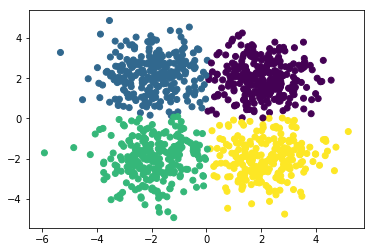

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      260    8    0    5
1        0    5  228    6
2        3    0    9  226
3        2  240    8    0


In [56]:
#Meanshift
bandwidth = estimate_bandwidth(X_train, quantile=.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

labels = ms.labels_

cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print("Comparing the assigned categories to the ones in the data:")
print(pd.crosstab(y_train,labels))

In [57]:
meanshift_correct_4 = 260+5+9
meanshift_correct_4 - meanshift_correct

-94

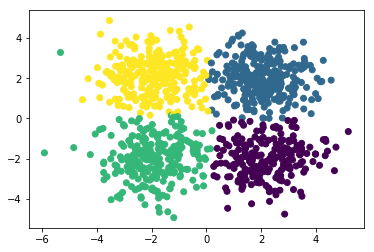

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        3  262    0    8
1        6    0  228    5
2      223    3   11    1
3        0    2   10  238


In [58]:
#Spectral Clustering

from sklearn.cluster import SpectralClustering

n_clusters = 4

sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

predict = sc.fit_predict(X_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print("Comparing the assigned categories to the ones in the data:")
print(pd.crosstab(y_train,predict))

In [59]:
spec_clust_correct_4 = 3+11+238
spec_clust_correct_4-spec_clust_correct

-713

In [60]:
# Affinity Propagation

af = AffinityPropagation().fit(X_train)
print("Done")

cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print("Estimated number of clusters: {}".format(n_clusters_))

Done
Estimated number of clusters: 25


In [63]:
affprop_clusters_4 = 25
affprop_clusters_4 - affprop_clusters_closeblobs

-8

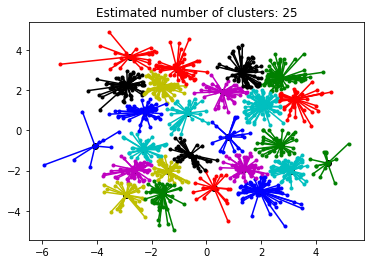

In [64]:
# visual of affinity propagation

plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + ".")
    plt.plot(cluster_center[0],
            cluster_center[1], "o", markerfacecolor=col,
            markeredgecolor="k")
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
        
plt.title("Estimated number of clusters: {}".format(n_clusters_))
plt.show()

### Configuration #3: 6 blobs

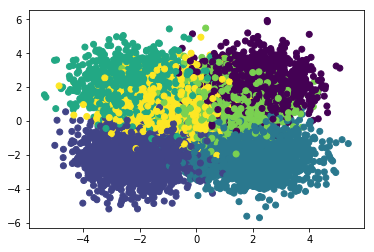

In [66]:
# adding two more blobs, 6 total

centers = [[2,2], [-2,-2], [2,-2], [-2, 2], [1, 1], [-1, 1]]

X, y = make_blobs(n_samples=10000, centers=centers, cluster_std=1, n_features=2, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9,random_state=42)

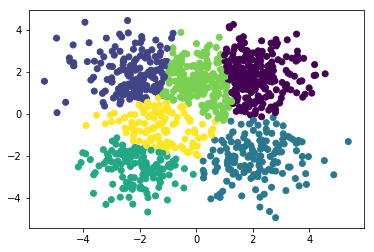

Comparing k-means clusters against the data:
col_0    0    1    2    3   4   5
row_0                            
0      148    0    5    0  76   2
1        0    2    0  128   1  47
2        0    3  138    0   7   1
3        0  127    1    0   0   0
4       28    0    2   31  75  65
5        0   54    5   10   6  38


In [67]:
# k-Means

from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=6).fit_predict(X_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

print("Comparing k-means clusters against the data:")
print(pd.crosstab(y_pred,y_train))

In [69]:
kmeans_correct_6 = 148+2+138+75+38
print(kmeans_correct_6 - kmeans_correct)
print(kmeans_correct_closeblobs - kmeans_correct)

35
535


Number of estimated clusters: 2


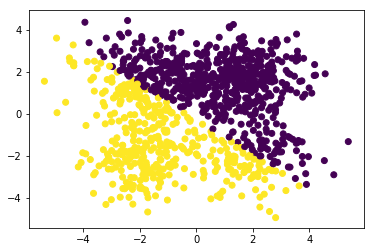

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      176    0
1        0  186
2       74   77
3      115   54
4      159    6
5       95   58


In [70]:
#Meanshift
bandwidth = estimate_bandwidth(X_train, quantile=.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

labels = ms.labels_

cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print("Comparing the assigned categories to the ones in the data:")
print(pd.crosstab(y_train,labels))

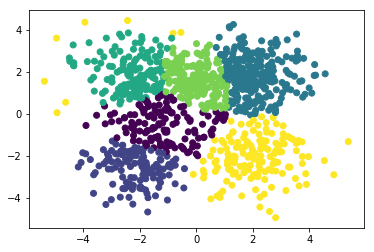

Comparing the assigned categories to the ones in the data:
col_0   0    1    2    3   4    5
row_0                            
0       0    0  152    0  24    0
1      55  125    0    0   0    6
2       7    1    5    0   0  138
3      14    0    0  118  32    5
4      14    0   81    1  60    9
5      44    0    2   45  61    1


In [71]:
#Spectral Clustering

from sklearn.cluster import SpectralClustering

n_clusters = 6

sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

predict = sc.fit_predict(X_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print("Comparing the assigned categories to the ones in the data:")
print(pd.crosstab(y_train,predict))

In [72]:
spec_clust_correct_6 = 125+5+118+61
spec_clust_correct_6-spec_clust_correct

-656

In [73]:
# Affinity Propagation

af = AffinityPropagation().fit(X_train)
print("Done")

cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print("Estimated number of clusters: {}".format(n_clusters_))

Done
Estimated number of clusters: 32


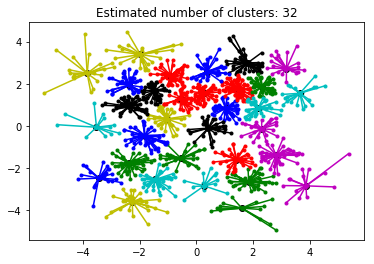

In [28]:
# visual of affinity propagation

plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + ".")
    plt.plot(cluster_center[0],
            cluster_center[1], "o", markerfacecolor=col,
            markeredgecolor="k")
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
        
plt.title("Estimated number of clusters: {}".format(n_clusters_))
plt.show()

**Learnings/Noticings From This Drill**
+ k-means was most accurate when the blobs were closer and was generally more accurate throughout
+ meanshift got less accurate when the blobs got closer together and when the number of blobs increased; also, when there were 6 blobs, it created 2 clusters
+ affinity propagation created LOTS of blobs; the highest number of blobs was with the original 3-blob data, and the number of clusters decreased in the other configurations
+ spectral clustering was the most accurate on the original configuration and got progressively worse with the increase of blobs